We start by importing the OpenFst Python wrapper:

In [1]:
import openfst_python as fst

Then we create tables for our symbols

In [2]:
input_sym = fst.SymbolTable()
output_sym = fst.SymbolTable()

input_sym.add_symbol('<eps>') # by convention, <eps> always
                              # has symbol zero
input_sym.add_symbol('a')
input_sym.add_symbol('b')
output_sym.add_symbol('c')
output_sym.add_symbol('d')

1

A **SymbolTable()** is simply a table associating symbols and indexes. We add symbols to the table with the method **add_symbol()**

Now that we've got our symbol tables, we will build the FST itself:

In [3]:
f = fst.Fst()

f.set_input_symbols(input_sym)
f.set_output_symbols(output_sym)

Our FST transduces the input to the outputs, so we set the symbol tables as such. Now, we want to add a number of states:

In [4]:
s0 = f.add_state()
s1 = f.add_state()
s2 = f.add_state()
s3 = f.add_state()

The output of the **add_state()** method is just the index assigned to the state, but it can be useful to assign that index to a variable to give it a more meaningful label.

To create arcs between states, we do:

In [5]:
a = input_sym.find('a')
b = input_sym.find('b')
c = output_sym.find('c')
d = output_sym.find('d')

f.add_arc(s0, fst.Arc(a, c, None, s1))
f.add_arc(s0, fst.Arc(b, d, None, s2))
f.add_arc(s1, fst.Arc(a, c, None, s3))
f.add_arc(s2, fst.Arc(b, d, None, s3))

The syntax for the method **add_arc** is:

**add_arc(*source state*, *arc to add*)**

while the syntax for initializing a class **Arc()** is:

**Arc(*input symbol index*, *output symbol index*, *weight*, *destination state*)**

We use the **find()** method of the symbol tables to get the index of a certain label.

Now we just add start and end states:

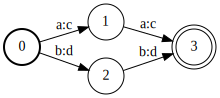

In [6]:
f.set_start(s0)
f.set_final(s3)

And voila, our first FST, shown in the example above, is done!

# Exercises


1. Create WFSTs representing the following HMMs:

    1. A 3-state left-to-right phone HMM with self-loops, for an arbitrary phone of your choice 
    2. The parallel-path left-to-right model shown on Slide 10 of Lecture 2
    3. An ergodic HMM with $n$ states (you will need to think about how to handle final states)

2. Using the provided phonetic dictionary in **lexicon_lab1.txt**, generate an HMM in WFST form for the word "peppers", by concatenating 3-state phone HMMs.  You can use **p_1**, **p_2**, ..., **eh_1**, ... to denote the phone states.  The word should appear as an output label.

In [1]:
less lexicon_lab1.txt

3. Generate an HMM that can recognise:

    1. any single phone contained in the lexicon
    2. any sequence of phones contained in the lexicon

4. You have decided that the best way to start teaching a friend English is to have them learn the notorious tongue-twister *peter piper picked a peck of pickled peppers*.  Using the provided dictionary, create an HMM that can:
    1. recognise any one of these words
    2. any sequence of these words

# If you have more time

Probabilities in WFSTs are traditionally expressed in negative log format, that is, the weight $w$ on an arc transitioning between states $i$ and $j$ is given by $w=-\log a_{ij}$, where $a_{ij}$ is the HMM transition probability.

5. Add weights to your WFSTs corresponding to transition probabilities.  Assume that the probability of a self-loop is $0.1$, and that when transitioning *between* separate phones or words, the probabilities are uniform over all transitions.